In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("driver-data.csv")

In [3]:
df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [4]:
df.isnull().sum(axis=0)

id                      0
mean_dist_day           0
mean_over_speed_perc    0
dtype: int64

In [6]:
df.dtypes

id                        int64
mean_dist_day           float64
mean_over_speed_perc      int64
dtype: object

Text(0, 0.5, 'mean_over_speed_perc')

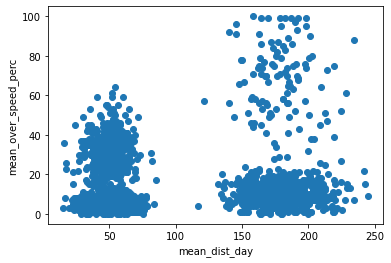

In [8]:
plt.scatter(df['mean_dist_day'],df['mean_over_speed_perc'])
plt.xlabel('mean_dist_day')
plt.ylabel('mean_over_speed_perc')

In [9]:
from sklearn.cluster import KMeans

In [11]:
# running algorithm with k is 3
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['mean_dist_day','mean_over_speed_perc']])
y_predicted

array([1, 1, 1, ..., 0, 0, 0])

In [13]:
# adding predicted cluster column to the dataset
df['cluster'] = y_predicted
df.sample(5)

,id,mean_dist_day,mean_over_speed_perc,cluster
1261,3423310514,39.79,4,1
3822,3423313801,184.46,4,0
2838,3423312179,56.83,5,1
1534,3423313415,48.69,6,1
3456,3423310707,169.02,4,0


In [24]:
# co ordinates of the cluster centre
km.cluster_centers_
km.inertia_

12184626.129627978

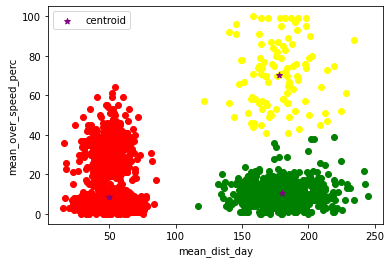

In [20]:
df_1 = df[df.cluster==0]
df_2 = df[df.cluster==1]
df_3 = df[df.cluster==2]

plt.scatter(df_1['mean_dist_day'],df_1['mean_over_speed_perc'],color='green')
plt.scatter(df_2['mean_dist_day'],df_2['mean_over_speed_perc'],color='red')
plt.scatter(df_3['mean_dist_day'],df_3['mean_over_speed_perc'],color='yellow')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label = 'centroid')
plt.xlabel('mean_dist_day')
plt.ylabel('mean_over_speed_perc')
plt.legend()

In [21]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]


In [25]:
# deciding the optimal no of cluster using elbow method
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['mean_dist_day','mean_over_speed_perc']])
    sse.append(km.inertia_)

In [26]:
sse # with increasing k ,inertia is going down

[12184626.129627978,
 1316420.850947719,
 992634.0606702475,
 719601.5383469039,
 534641.5527374671,
 372842.7821458491,
 319730.6886818547,
 276879.7707571387,
 252770.6123029082]

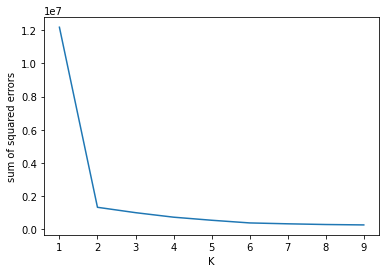

In [27]:
#now lets plot the elbow
plt.xlabel('K')
plt.ylabel('sum of squared errors')
plt.plot(k_rng,sse)

In [28]:
# we see the elbow point is 2 or upto 4 w e can try
# lets do with
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['mean_dist_day','mean_over_speed_perc']])
y_predicted

array([0, 0, 0, ..., 1, 1, 1])

In [38]:
#lets do this with numpy array
X = df.iloc[:,:].values
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(X)
y_predicted

array([0, 2, 2, ..., 0, 2, 1])

In [39]:
# noe lets plot graph
X[y_predicted==1,1]

array([ 55.69,  54.58,  52.02, ..., 167.05, 160.04, 168.03])

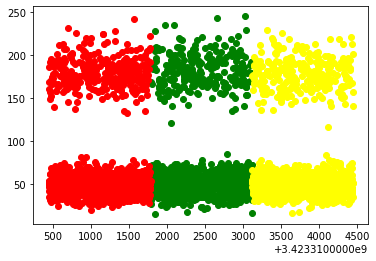

In [41]:
plt.scatter(X[y_predicted==0,0],X[y_predicted==0,1],color = 'green')
plt.scatter(X[y_predicted==1,0],X[y_predicted==1,1],color = 'red')
plt.scatter(X[y_predicted==2,0],X[y_predicted==2,1],color = 'yellow')